In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Model,Sequential
from keras.layers import Dense,Input,Flatten,LeakyReLU
from keras.activations import relu,softmax,tanh,sigmoid
from sklearn.model_selection import train_test_split
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam
from keras.utils import np_utils


In [11]:
data=pd.read_csv("./musk_csv - musk_csv.csv")

In [12]:
x = data.values
X = x[:,3:168]
y = x[:,169]

y=np_utils.to_categorical(y)




In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

print(X_train.shape)

(5278, 165)


In [14]:

model=Sequential()
model.add(Dense(256, activation='tanh', input_shape=(165,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               42496     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 130       
Total params: 59,074
Trainable params: 59,074
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, epochs=10, 
                    batch_size=200, shuffle=True, 

                    validation_data=(X_test,y_test))

Train on 5278 samples, validate on 1320 samples
Epoch 1/10
5278/5278 [==============================] - 1s 109us/step - loss: 0.4741 - acc: 0.7928 - val_loss: 0.4044 - val_acc: 0.8390
Epoch 2/10
5278/5278 [==============================] - 0s 51us/step - loss: 0.3733 - acc: 0.8537 - val_loss: 0.3636 - val_acc: 0.8542
Epoch 3/10
5278/5278 [==============================] - 0s 49us/step - loss: 0.3361 - acc: 0.8710 - val_loss: 0.3389 - val_acc: 0.8701
Epoch 4/10
5278/5278 [==============================] - 0s 58us/step - loss: 0.3079 - acc: 0.8891 - val_loss: 0.3142 - val_acc: 0.8856
Epoch 5/10
5278/5278 [==============================] - 0s 54us/step - loss: 0.2837 - acc: 0.9033 - val_loss: 0.2946 - val_acc: 0.8951
Epoch 6/10
5278/5278 [==============================] - 0s 56us/step - loss: 0.2615 - acc: 0.9104 - val_loss: 0.2757 - val_acc: 0.9011
Epoch 7/10
5278/5278 [==============================] - 0s 56us/step - loss: 0.2433 - acc: 0.9177 - val_loss: 0.2620 - val_acc: 0.9072
Epoch 

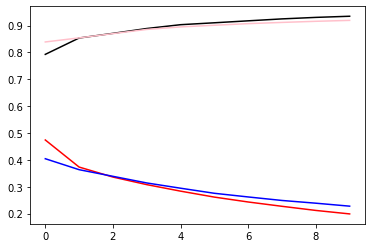

In [38]:

plt.plot(history.history['loss'], color='red')

plt.plot(history.history['val_loss'], color='blue')

plt.plot(history.history['acc'], color='black')

plt.plot(history.history['val_acc'], color='pink')
plt.show()

In [39]:
model.evaluate(X_test,y_test)

1320/1320 [==============================] - 0s 40us/step


[0.22776811755064763, 0.9193181818181818]

In [40]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

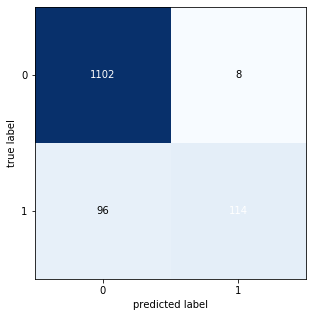

In [41]:

CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()


In [42]:
recall=(114/(8+114))*100

print(recall)

93.44262295081968


In [43]:
precision=(114/(114+96))*100
print(precision)

54.285714285714285


In [44]:
F1_score = 2 * (precision * recall) / (precision + recall)

print(F1_score)


68.67469879518072
